Load dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA
import numpy as np

Load data

In [3]:
df = pd.read_csv("../assignments/data/iris_train.csv")
y = df["Species"]
X = df.drop(columns='Species')

Pie chart for dependent variable y

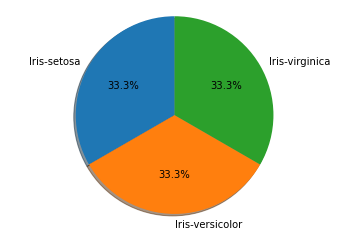

In [4]:
sizes = Counter(y)
fig1, ax1 = plt.subplots()
ax1.pie(sizes.values(), labels=sizes.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Histogram for SepalLengthCm

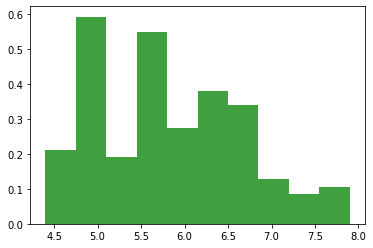

In [5]:
sl = df["SepalLengthCm"]
n, bins, patches = plt.hist(sl, bins=10, density=True, facecolor='g', alpha=0.75)

Histogram for PetalWidthCm

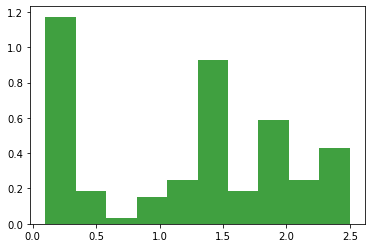

In [7]:
sl = df["PetalWidthCm"]
n, bins, patches = plt.hist(sl, bins=10, density=True, facecolor='g', alpha=0.75)

Scatter plot on the first two principal components

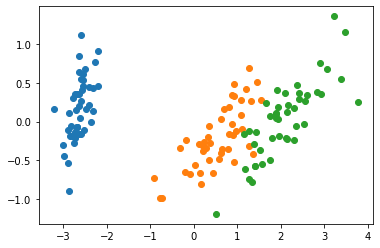

In [8]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(X)

group = {}
for i, value in enumerate(y):
    if value not in group:
        group[value] = []
    group[value].append(i)

fig2, ax2 = plt.subplots()
for i, value in enumerate(group):
    ax2.scatter(pcs[group[value],0], pcs[group[value],1])

plt.show()

Heatmap for correlation matrix of the data

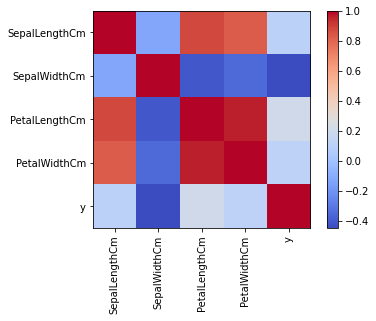

In [16]:
mapp = {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":0}
y_num = [mapp[v] for v in y]

X['y'] = y_num
data_corr = X.corr()

plt.imshow(X.corr(), cmap="coolwarm", interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(X.columns))]
plt.xticks(tick_marks, X.columns, rotation='vertical')
plt.yticks(tick_marks, X.columns)
plt.show()